<a href="https://www.kaggle.com/code/bandhansingh/k-means-clustering?scriptVersionId=93172478" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("../input/income-dataset/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


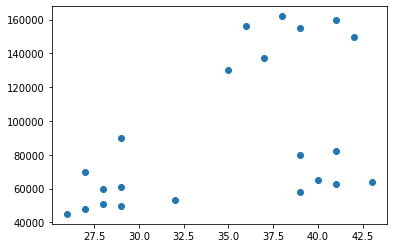

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

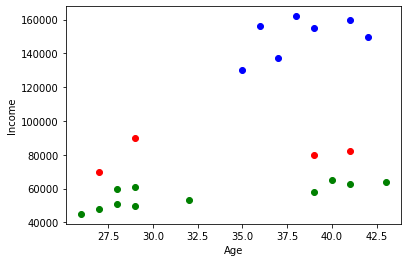

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'],df1['Income($)'], color='red')
plt.scatter(df2['Age'],df2['Income($)'], color='blue')
plt.scatter(df3['Age'],df3['Income($)'], color='green')

plt.xlabel("Age")
plt.ylabel("Income")

**Preprocessing using MinMaxScaler**

In [8]:
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [9]:
# Now again using KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [10]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [11]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'Income')

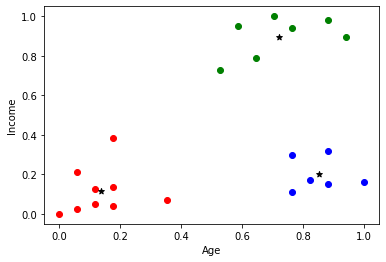

In [12]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'],df1['Income($)'], color='red')
plt.scatter(df2['Age'],df2['Income($)'], color='blue')
plt.scatter(df3['Age'],df3['Income($)'], color='green')

# plot centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', color='black')

plt.xlabel("Age")
plt.ylabel("Income")

**using elbow technique to find the no. of clusters required**

In [13]:
sse = []
k_range = range(1,10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
    
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2766936276300279,
 0.21578607765873023,
 0.16869711728567788,
 0.1420361384295375,
 0.10629897421405132]

Text(0, 0.5, 'Sum of squared error -->')

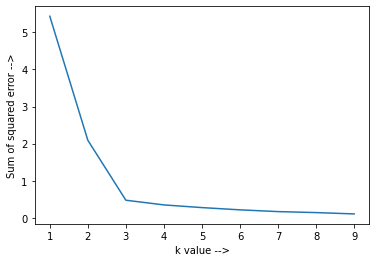

In [14]:
plt.plot(k_range, sse)
plt.xlabel("k value -->")
plt.ylabel("Sum of squared error -->")

Here in the above we can see that the elbow is at k = 3 , therefore only 3 clusters are required